# Data cleaning:

In [2]:
path1 = "pichu.txt"
path2 = "pikachu.txt"
path3 = "test_points.txt"

with open (path1, "r") as p1, open (path2, "r") as p2:

    pichu = [pichu.strip("\n" "()").split(",") for pichu in p1.readlines()]
    pichu.pop(0)

    pikachu = [pikachu.strip("\n" "()").split(",") for pikachu in p2.readlines()]
    pikachu.pop(0)

# Clean the datas, remove all the non-digital noises and make a list of x,y
    
    pichu_width = [float(pichu[0]) for pichu in pichu]
    pichu_height = [float(pichu[1]) for pichu in pichu]

    pikachu_width = [float(pikachu[0]) for pikachu in pikachu]
    pikachu_height = [float(pikachu[1]) for pikachu in pikachu]

# Remark and separate the width/height from Pichu and Pikachu; change datas from string to float

with open (path3, "r") as t:

    test = [test for test in t.readline().split("),")]
    test = [test2.strip("( )") for test2 in test]
    test = [test3.split(",") for test3 in test]

# split first with readline(), then remove all the "()", finally split again with ","

    test_width = [float(test[0]) for test in test]
    test_height = [float(test[1]) for test in test]
    
# print(pichu)
# print(pikachu)
# print(pichu_width)
# print(pichu_height)
# print(pikachu_width)
# print(pikachu_height)

# print(test)
# print(test_width)
# print(test_height)


# Scatter plot:

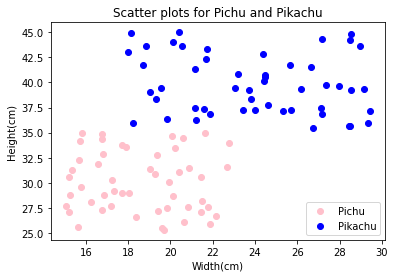

In [3]:
import matplotlib.pyplot as plt

pichu_plot = plt.scatter(pichu_width, pichu_height, color="pink")
# axel X : Pichu_width ; axel Y : Pichu_height

pikachu_plot = plt.scatter(pikachu_width, pikachu_height, color="blue")
# axel X : Pikachu_width ; axel Y : Pikachu_height

plt.xlabel("Width(cm)")
plt.ylabel("Height(cm)")
plt.title("Scatter plots for Pichu and Pikachu")
plt.legend(handles = (pichu_plot, pikachu_plot), labels  = ('Pichu', 'Pikachu'))
plt.show()

In [16]:
def distance(t_x, t_y, p_x, p_y):
    return ((t_x-p_x)**2 + (t_y-p_y)**2)**0.5

t_x = test_width
t_y = test_height
p_x = pichu_width
p_y = pichu_height

a= [distance(test_width[0], test_height[0], p_x, p_y) for p_x, p_y in pokemon]
print(a)

TypeError: unsupported operand type(s) for -: 'float' and 'str'

# Users input and error handling:

In [486]:
while True:

    width = input("Entre a width value of your pokemon")
    height = input("Entre a height value of your pokemon")

    try: 

        if width.isalpha() or height.isalpha():
            raise ValueError("Values must be numerical, please") 
# Error hint for non-numerical inputs

        width = float(width)
        height = float(height)

        if width <= 0 or width >= 30:
            raise ValueError("Width values must between 0 and 30, please")
        
        if height <= 0 or height >= 50:
            raise ValueError("Height values must between 0 and 50, please")
# Error hint for Out-of-range inputs

        break

    except ValueError as err:
        print(err)

Width values must between 0 and 30
